# Info
Name:  

    SEAC4RS_cld_compare_v5_small

Purpose:  

    Python script to simplify the SEAC4RS_compare_v5 script. 
    Used for making the figures in the paper:
        Comparing Cloud properties and radiative effect estimated from airborne measurements of transmitted and reflected light
        LeBlanc et al., JGR 

Input:

    none at command line
  
Output:

    figures and save files...
  
Keywords:

    none
  
Dependencies:

    - Sp_parameters.py : for Sp class definition, and for defining the functions used to build parameters
    - run_kisq_retrieval.py : for the retrieval functions
    - load_utils.py : for loading modis files
    - matplotlib
    - mpltools
    - numpy
    - plotly : optional
    - scipy : for saving and reading
    - math
    - os
    - gc
    - pdb
    - datetime
    - pyhdf
    - mpl_toolkits
    - gdal (from osgeo)
    - plotting_utils (user defined plotting routines)
    - map_utils, dependent on geopy
    - hdf5storage
  
Needed Files:

  - file.rc : for consistent creation of look of matplotlib figures
  - sp_v3_20130913_4STAR.out: modeled spectra output for SEAC4RS at sza 17.9, idl save file
  - %%20130219starzen_rad.mat : special zenith radiance 4star matlab file 
  - ict files from 20130913
  
Modification History:

    Written: Samuel LeBlanc, Santa Cruz, CA, 2016-11-11
             ported from SEAC4RS_compare_v5

# Load the required python modules

In [1]:
%config InlineBackend.rc = {}
import matplotlib 
#matplotlib.rc_file('C:\\Users\\sleblan2\\Research\\python_codes\\file.rc')
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpltools import color

import numpy as np
import scipy.io as sio
import math
import os
import Sp_parameters as Sp

import hdf5storage as hs
from load_utils import mat2py_time, toutc, load_ict

from Sp_parameters import smooth
import cPickle as pickle
from path_utils import getpath

In [2]:
%matplotlib notebook

In [3]:
fp = getpath('SEAC4RS')
fp

u'/mnt/c/Users/sleblanc/Research/SEAC4RS/'

In [4]:
vv = 'v6'

# Load some files for easier processing

## get the retrieval results

In [5]:
m_dict = hs.loadmat(fp+'20130913_retrieval_output.mat')

In [6]:
m_dict.keys()

[u'modis', u'emas', u'star', u'time_created', u'goes', u'rsp', u'ssfr']

In [7]:
if not 'emas_tau_full' in vars():
    print 'not defined, loading from file'
    emas_tau_full = m_dict['emas'][1]; emas_ref_full = m_dict['emas'][3]; emas_utc_full = m_dict['emas'][5]
    modis_tau = m_dict['modis'][1]; modis_ref = m_dict['modis'][3]
    ssfr_tau = m_dict['ssfr'][1]; ssfr_ref = m_dict['ssfr'][3]; ssfr_utc = m_dict['ssfr'][5]
    rsp_tau = m_dict['rsp'][1]; rsp_ref = m_dict['rsp'][3]; rsp_utc = m_dict['rsp'][5]
    star_tau = m_dict['star'][1]; star_ref = m_dict['star'][3]
    goes_tau = m_dict['goes'][1]; goes_ref = m_dict['goes'][3]
    goes_utc = m_dict['goes'][5]; star_utc = m_dict['star'][5]

not defined, loading from file


## Now get the variability

In [8]:
if not 'stats' in vars():
    stats = pickle.load(open(fp+'20130913_stats_output.p',"rb"))

In [9]:
stats.keys()

['ssfr_tau',
 'modis_ref',
 'dc8_utc',
 'dc8_lon',
 'ssfr_ref',
 'rsp_ref',
 'er2_lat',
 'modis_tau',
 'star_tau',
 'goes_ref',
 'er2_utc',
 'star_ref',
 'rsp_tau',
 'er2_lon',
 'goes_tau',
 'dc8_lat']

In [10]:
er2_utc = stats['er2_utc']

In [11]:
stats['modis_tau'].keys()

[u'std', u'index', u'range', u'median', u'mean']

## Calculate some values based on the stats

In [12]:
from scipy import interpolate

In [13]:
# Do the tau
modis_tau_stdfx = interpolate.interp1d(er2_utc,stats['modis_tau']['std'],bounds_error=False)
modis_tau_std = modis_tau_stdfx(star_utc)
modis_tau_std[np.isnan(modis_tau_std)] = np.mean(stats['modis_tau']['std'])

#emas_tau_stdfx = interpolate.interp1d(er2_utc,stats['emas_tau']['std'],bounds_error=False)
#emas_tau_std = emas_tau_stdfx(emas_utc_full)

ssfr_tau_stdfx = interpolate.interp1d(er2_utc,stats['ssfr_tau']['std'],bounds_error=False)
ssfr_tau_std = ssfr_tau_stdfx(ssfr_utc)
ssfr_tau_std[np.isnan(ssfr_tau_std)] = np.mean(stats['ssfr_tau']['std'])

rsp_tau_stdfx = interpolate.interp1d(er2_utc,stats['rsp_tau']['std'],bounds_error=False)
rsp_tau_std = rsp_tau_stdfx(rsp_utc)
rsp_tau_std[np.isnan(rsp_tau_std)] = np.mean(stats['rsp_tau']['std'])

goes_tau_stdfx = interpolate.interp1d(er2_utc,stats['goes_tau']['std'],bounds_error=False)
goes_tau_std = goes_tau_stdfx(goes_utc)
goes_tau_std[np.isnan(goes_tau_std)] = np.mean(stats['goes_tau']['std'])

star_tau_stdfx = interpolate.interp1d(er2_utc,stats['star_tau']['std'],bounds_error=False)
star_tau_std = star_tau_stdfx(star_utc)
star_tau_std[np.isnan(star_tau_std)] = np.mean(stats['star_tau']['std'])

In [14]:
# Do the ref
modis_ref_stdfx = interpolate.interp1d(er2_utc,stats['modis_ref']['std'],bounds_error=False)
modis_ref_std = modis_ref_stdfx(star_utc)
modis_ref_std[np.isnan(modis_ref_std)] = np.mean(stats['modis_ref']['std'])

#emas_ref_stdfx = interpolate.interp1d(er2_utc,stats['emas_ref']['std'],bounds_error=False)
#emas_ref_std = emas_ref_stdfx(emas_utc_full)

ssfr_ref_stdfx = interpolate.interp1d(er2_utc,stats['ssfr_ref']['std'],bounds_error=False)
ssfr_ref_std = ssfr_ref_stdfx(ssfr_utc)
ssfr_ref_std[np.isnan(ssfr_ref_std)] = np.mean(stats['ssfr_ref']['std'])

rsp_ref_stdfx = interpolate.interp1d(er2_utc,stats['rsp_ref']['std'],bounds_error=False)
rsp_ref_std = rsp_ref_stdfx(rsp_utc)
rsp_ref_std[np.isnan(rsp_ref_std)] = np.mean(stats['rsp_ref']['std'])

goes_ref_stdfx = interpolate.interp1d(er2_utc,stats['goes_ref']['std'],bounds_error=False)
goes_ref_std = goes_ref_stdfx(goes_utc)
goes_ref_std[np.isnan(goes_ref_std)] = np.mean(stats['goes_ref']['std'])

star_ref_stdfx = interpolate.interp1d(er2_utc,stats['star_ref']['std'],bounds_error=False)
star_ref_std = star_ref_stdfx(star_utc)
star_ref_std[np.isnan(star_ref_std)] = np.mean(stats['star_ref']['std'])

## Load the CPL layers data

In [15]:
cpl_layer_file = fp+'er2/20130913/layers_13965_13sep13.txt'
import load_utils as lm
reload(lm)
from load_utils import load_cpl_layers
cpl_layers = load_cpl_layers(cpl_layer_file)

In [16]:
cpl_layers.dtype.names

('hh',
 'mm',
 'ss',
 'lat',
 'lon',
 'alt',
 'rol',
 'num',
 'gh',
 'top',
 'bot',
 'type',
 'utc')

## Load the APR data

In [17]:
fa = fp+'dc8/20130913/SEAC4RS-APR2_DC8_20130913/SEAC4RS-APR2_DC8_20130913'
fe = '_R23.h4'
files = ['180527','181019','182329','184933','190145','192149','194031']
aprfiles = [fa+s+fe for s in files]

In [18]:
import load_utils as lu

In [19]:
apr = lu.load_apr(aprfiles)

Running file:  C:/Users/sleblan2/Research/SEAC4RS/dc8/20130913//SEAC4RS-APR2_DC8_20130913/SEAC4RS-APR2_DC8_20130913180527_R23.h4
Running file:  C:/Users/sleblan2/Research/SEAC4RS/dc8/20130913//SEAC4RS-APR2_DC8_20130913/SEAC4RS-APR2_DC8_20130913181019_R23.h4
Running file:  C:/Users/sleblan2/Research/SEAC4RS/dc8/20130913//SEAC4RS-APR2_DC8_20130913/SEAC4RS-APR2_DC8_20130913182329_R23.h4
swaping axes
Running file:  C:/Users/sleblan2/Research/SEAC4RS/dc8/20130913//SEAC4RS-APR2_DC8_20130913/SEAC4RS-APR2_DC8_20130913184933_R23.h4
Running file:  C:/Users/sleblan2/Research/SEAC4RS/dc8/20130913//SEAC4RS-APR2_DC8_20130913/SEAC4RS-APR2_DC8_20130913190145_R23.h4
Running file:  C:/Users/sleblan2/Research/SEAC4RS/dc8/20130913//SEAC4RS-APR2_DC8_20130913/SEAC4RS-APR2_DC8_20130913192149_R23.h4
Running file:  C:/Users/sleblan2/Research/SEAC4RS/dc8/20130913//SEAC4RS-APR2_DC8_20130913/SEAC4RS-APR2_DC8_20130913194031_R23.h4
['dbz', 'zen_dbz', 'altfltz', 'utc', 'dbz_35', 'latz', 'altflt', 'lonz']
Loaded data

### Plot out the APR reflectivity

<IPython.core.display.Javascript object>


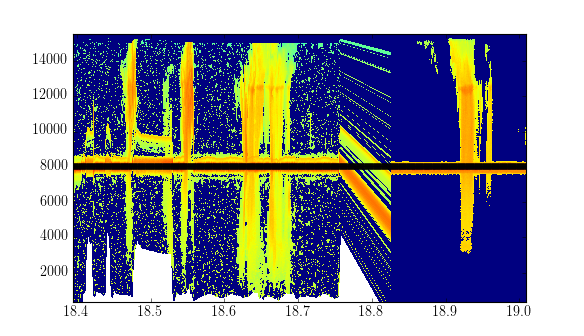

In [22]:
plt.figure()
plt.pcolor(apr['utc'],apr['altflt'],apr['dbz'])
plt.plot(dc8['TIME_UTC'],dc8['G_ALT'],'k+')

<IPython.core.display.Javascript object>


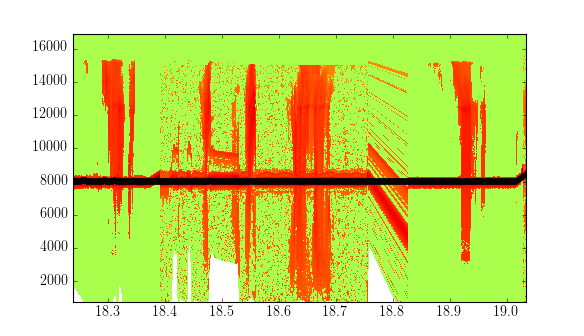

In [23]:
plt.figure()
plt.pcolor(apr['utc'],apr['altflt'],apr['dbz_35'])
plt.plot(dc8['TIME_UTC'],dc8['G_ALT'],'k+')

<IPython.core.display.Javascript object>


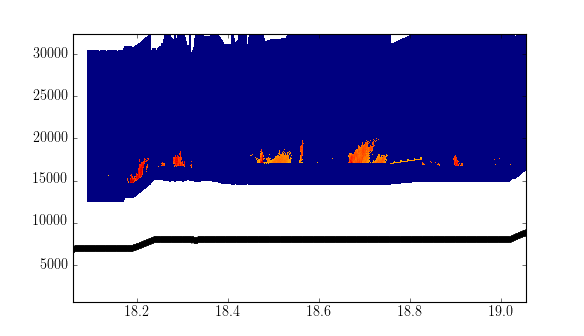

In [24]:
plt.figure()
plt.pcolor(apr['utc'],apr['altfltz'],apr['zen_dbz'])
plt.plot(dc8['TIME_UTC'],dc8['G_ALT'],'k+')

### Filter out the bad data from the reflectivity, and make -999 nans

In [82]:
apr['dbz'] = apr['dbz'].astype(float)

In [83]:
apr['dbz'][apr['dbz']<-100.0] = np.nan

In [73]:
apr['altflt'].shape

(600L, 3207L)

In [76]:
dc8['G_ALT'].shape

(29248L,)

In [77]:
apr['utc'].shape

(3207L,)

In [90]:
for i,t in enumerate(apr['utc']):
    alt = dc8['G_ALT'][np.argmin(abs(dc8['TIME_UTC']-t))]
    apr['dbz'][(apr['altflt'][:,i]<(alt+500))&(apr['altflt'][:,i]>(alt-500)),i] = np.nan

## Load the 2DS data for effective radius

In [18]:
twoDS,twoDS_h = load_ict(fp+'dc8/20130913/seac4rs-2DS_DC8_20130913_R0.ict',return_header=True)

('Start_UTC', 'sv', 'conc', 'ext', 'iwc', 'irregularCNT', 'meanD', 'medianvolD', 'effectiveD', 'nbin01', 'nbin02', 'nbin03', 'nbin04', 'nbin05', 'nbin06', 'nbin07', 'nbin08', 'nbin09', 'nbin10', 'nbin11', 'nbin12', 'nbin13', 'nbin14', 'nbin15', 'nbin16', 'nbin17', 'nbin18', 'nbin19', 'nbin20', 'nbin21', 'nbin22', 'nbin23', 'nbin24', 'nbin25', 'nbin26', 'nbin27', 'nbin28', 'nbin29', 'nbin30', 'nbin31', 'nbin32', 'nbin33', 'nbin34', 'nbin35', 'nbin36', 'nbin37', 'nbin38', 'nbin39', 'nbin40', 'nbin41', 'nbin42', 'nbin43', 'nbin44', 'nbin45', 'nbin46', 'nbin47', 'nbin48', 'nbin49', 'nbin50', 'nbin51', 'nbin52', 'nbin53', 'nbin54', 'nbin55', 'nbin56', 'nbin57', 'nbin58', 'nbin59', 'nbin60', 'nbin61', 'abin01', 'abin02', 'abin03', 'abin04', 'abin05', 'abin06', 'abin07', 'abin08', 'abin09', 'abin10', 'abin11', 'abin12', 'abin13', 'abin14', 'abin15', 'abin16', 'abin17', 'abin18', 'abin19', 'abin20', 'abin21', 'abin22', 'abin23', 'abin24', 'abin25', 'abin26', 'abin27', 'abin28', 'abin29', 'abin

In [19]:
# filter the data and only show a part
twoDS['effectiveD'][twoDS['effectiveD']<0] = np.nan
fl = np.where((twoDS['Start_UTC'] > 18.025) & (twoDS['Start_UTC'] < 19.45) & (twoDS['effectiveD'] > 5.0))

In [20]:
twoDS.dtype.names

('Start_UTC',
 'sv',
 'conc',
 'ext',
 'iwc',
 'irregularCNT',
 'meanD',
 'medianvolD',
 'effectiveD',
 'nbin01',
 'nbin02',
 'nbin03',
 'nbin04',
 'nbin05',
 'nbin06',
 'nbin07',
 'nbin08',
 'nbin09',
 'nbin10',
 'nbin11',
 'nbin12',
 'nbin13',
 'nbin14',
 'nbin15',
 'nbin16',
 'nbin17',
 'nbin18',
 'nbin19',
 'nbin20',
 'nbin21',
 'nbin22',
 'nbin23',
 'nbin24',
 'nbin25',
 'nbin26',
 'nbin27',
 'nbin28',
 'nbin29',
 'nbin30',
 'nbin31',
 'nbin32',
 'nbin33',
 'nbin34',
 'nbin35',
 'nbin36',
 'nbin37',
 'nbin38',
 'nbin39',
 'nbin40',
 'nbin41',
 'nbin42',
 'nbin43',
 'nbin44',
 'nbin45',
 'nbin46',
 'nbin47',
 'nbin48',
 'nbin49',
 'nbin50',
 'nbin51',
 'nbin52',
 'nbin53',
 'nbin54',
 'nbin55',
 'nbin56',
 'nbin57',
 'nbin58',
 'nbin59',
 'nbin60',
 'nbin61',
 'abin01',
 'abin02',
 'abin03',
 'abin04',
 'abin05',
 'abin06',
 'abin07',
 'abin08',
 'abin09',
 'abin10',
 'abin11',
 'abin12',
 'abin13',
 'abin14',
 'abin15',
 'abin16',
 'abin17',
 'abin18',
 'abin19',
 'abin20',
 'abin

In [21]:
twoDS_h

['287, 1001\r\n',
 'Lawson, Paul\r\n',
 'SPEC Inc\r\n',
 '2DS on DC8\r\n',
 'SEAC4RS\r\n',
 '1, 1\r\n',
 '2013, 09, 13 ,   2014,7,9\r\n',
 '1\r\n',
 'Start_UTC, seconds, elapsed time from 00:00:00 UTC\r\n',
 '253\r\n',
 '1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1\r\n',
 '-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,

## Load the HVPS data for effective radius (second in situ method)

In [17]:
hvps,hvps_h = load_ict(fp+'dc8/20130913/SEAC4RS-HVPS_DC8_20130913_R0.ict',return_header=True)

('Start_UTC', 'sv', 'conc', 'ext', 'iwc', 'irregularCNT', 'meanD', 'medianvolD', 'effectiveD', 'nbin01', 'nbin02', 'nbin03', 'nbin04', 'nbin05', 'nbin06', 'nbin07', 'nbin08', 'nbin09', 'nbin10', 'nbin11', 'nbin12', 'nbin13', 'nbin14', 'nbin15', 'nbin16', 'nbin17', 'nbin18', 'nbin19', 'nbin20', 'nbin21', 'nbin22', 'nbin23', 'nbin24', 'nbin25', 'nbin26', 'nbin27', 'nbin28', 'nbin29', 'nbin30', 'nbin31', 'nbin32', 'nbin33', 'nbin34', 'nbin35', 'nbin36', 'nbin37', 'nbin38', 'nbin39', 'nbin40', 'nbin41', 'nbin42', 'nbin43', 'nbin44', 'nbin45', 'nbin46', 'nbin47', 'nbin48', 'nbin49', 'nbin50', 'nbin51', 'nbin52', 'nbin53', 'nbin54', 'nbin55', 'nbin56', 'nbin57', 'nbin58', 'nbin59', 'nbin60', 'nbin61', 'abin01', 'abin02', 'abin03', 'abin04', 'abin05', 'abin06', 'abin07', 'abin08', 'abin09', 'abin10', 'abin11', 'abin12', 'abin13', 'abin14', 'abin15', 'abin16', 'abin17', 'abin18', 'abin19', 'abin20', 'abin21', 'abin22', 'abin23', 'abin24', 'abin25', 'abin26', 'abin27', 'abin28', 'abin29', 'abin

In [22]:
hvps_h

['287, 1001\r\n',
 'Lawson, Paul\r\n',
 'Spec Inc\r\n',
 'HVPS on DC8\r\n',
 'SEAC4RS  \r\n',
 '1, 1\r\n',
 '2013,  09, 13,   2014,6,20\r\n',
 '1\r\n',
 'Start_UTC, seconds, elapsed time from 00:00:00 UTC\r\n',
 '253\r\n',
 '1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1\r\n',
 '-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-

In [23]:
hvpsd = {key: hvps[key] for key in hvps.dtype.names}

In [24]:
hvpsd['dr_m'] = np.array([75,225,375,525,675,825,975,1125,1275,1425,1575,1725,1875,2025,2175,2325,2475,2625,2775,2925,3075,3375,3675,3975,4275,4575,4875,5175,5475,5775,6075,6375,6675,6975,7275,7575,8375,9075,9825,10575,11325,12075,12875,12825,13575,14325,15075,16575,18075,19575,21075,22575,24075,25575,27075,28575,30075,33075,33075,36075,39075,42075,45075])
hvpsd['dr_p'] = np.array([225,375,525,675,825,975,1125,1275,1425,1575,1725,1875,2025,2175,2325,2475,2625,2775,2925,3075,3375,3675,3975,4275,4575,4875,5175,5475,5775,6075,6375,6675,6975,7275,7575,8375,9075,9825,10575,11325,12075,12875,12825,13575,14325,15075,16575,18075,19575,21075,22575,24075,25575,27075,28575,30075,33075,33075,36075,39075,42075,45075,50075])

In [25]:
hvpsd['effD'] = np.zeros_like(hvps['Start_UTC'])
hvpsd['dr'] = hvpsd['dr_p']-hvpsd['dr_m']
hvpsd['mean_r'] = (hvpsd['dr_p']+hvpsd['dr_m'])/2.0

## Load the FCDP data

In [26]:
fcdp_in,fcdp_header = load_ict(fp+'dc8/20130913/Seac4rs-FCDP_DC8_20130913_R0.ict',return_header=True)

('Start_UTC', 'conc', 'ext', 'lwc', 'sv', 'CNT', 'cbin01', 'cbin02', 'cbin03', 'cbin04', 'cbin05', 'cbin06', 'cbin07', 'cbin08', 'cbin09', 'cbin10', 'cbin11', 'cbin12', 'cbin13', 'cbin14', 'cbin15', 'cbin16', 'cbin17', 'cbin18', 'cbin19', 'cbin20', 'cbin21', 'nbin01', 'nbin02', 'nbin03', 'nbin04', 'nbin05', 'nbin06', 'nbin07', 'nbin08', 'nbin09', 'nbin10', 'nbin11', 'nbin12', 'nbin13', 'nbin14', 'nbin15', 'nbin16', 'nbin17', 'nbin18', 'nbin19', 'nbin20', 'nbin21')


In [27]:
fcdp_header

['78, 1001\r\n',
 'Lawson, Paul\r\n',
 'Spec Inc\r\n',
 'FCDP on DC8\r\n',
 'SEAC4RS\r\n',
 '1, 1\r\n',
 '2013,09,13,2015,3,5\r\n',
 '1\r\n',
 'Start_UTC, seconds, elapsed time from 00:00:00 UTC\r\n',
 '47\r\n',
 '1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1\r\n',
 '-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002\r\n',
 'conc, #/L, particle number concentration\r\n',
 'ext,  1/km,  extinction of the particles\r\n',
 'lwc, g/m^3,   liquid water content\r\n',
 'sv, liter, sample 

### Now from the FCDP distributions, calculate the effectve radius

In [28]:
fcdp = {key: fcdp_in[key] for key in fcdp_in.dtype.names}

In [29]:
fcdp['dr_m'] = np.array([0.0,1.0,3.2,9.4,12.0,15.6,17.7,19.8,22.4,25.8,28.8,30.9,32.7,34.4,36.4,38.7,41.3,42.9,44.7,47.1,50.0])
fcdp['dr_p'] = np.array([1.0,3.2,9.4,12.0,15.6,17.7,19.8,22.4,25.8,28.8,30.9,32.7,34.4,36.4,38.7,41.3,42.9,44.7,47.1,50.0,100.0])

In [30]:
fcdp['effD'] = np.zeros_like(fcdp['Start_UTC'])
fcdp['dr'] = fcdp['dr_p']-fcdp['dr_m']
fcdp['mean_r'] = (fcdp['dr_p']+fcdp['dr_m'])/2.0

In [31]:
fcdp['bin_names'] = np.sort([k for k in fcdp.keys() if 'nbin' in k])

In [32]:
fcdp['n_r'] = []
for n in fcdp['bin_names']:
    fcdp['n_r'].append(fcdp[n])
fcdp['n_r'] = np.array(fcdp['n_r'])

In [33]:
fcdp['n_r'].shape

(21, 29221)

In [34]:
for i in xrange(len(fcdp['Start_UTC'])):
    top = fcdp['mean_r']**3.0*fcdp['n_r'][:,i]*fcdp['dr']
    bot = fcdp['mean_r']**2.0*fcdp['n_r'][:,i]*fcdp['dr']
    if fcdp['CNT'][i] >5:
        fcdp['effD'][i] = np.sum(top)/np.sum(bot)
    else:
        fcdp['effD'][i] = np.nan

## Load the DC8 nav data

In [35]:
dc8,dc8_header = load_ict(fp+'dc8/20130913/SEAC4RS-MMS-1HZ_DC8_20130913_R0.ict',return_header=True)

Some Scaling factors are not equal to one, Please check the factors:
[0.01, 0.01, 0.01, 0.01, 0.01, 0.001, 0.01, 0.01, 1e-05, 1e-05, 0.1, 0.01, 0.01, 0.01, 0.01]
('TIME_UTC', 'P', 'T', 'TAS', 'U', 'V', 'W', 'TEDR', 'REYN', 'G_LAT', 'G_LONG', 'G_ALT', 'POT', 'ROLL', 'HDG', 'PITCH')


In [36]:
dc8_header

['51, 1001                                                                                                                                                                                                \r\n',
 'Bui, T. Paul                                                                                                                                                                                            \r\n',
 'NASA Ames Research Center                                                                                                                                                                               \r\n',
 'MMS - Meteorological Measurement System                                                                                                                                                                 \r\n',
 'SEAC4RS                                                                                                                                                           

# Ploting of the combine effective radius

## Now make a plot of the time series for easier referencing

<IPython.core.display.Javascript object>


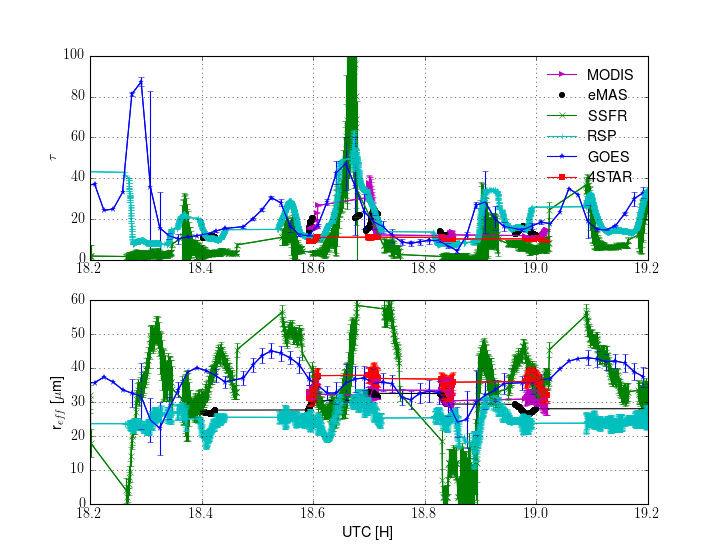

In [39]:
plt.figure(figsize=(9,7))
ax1 = plt.subplot(211)
ax1.plot(star_utc,smooth(modis_tau,6),'m->',label='MODIS',markeredgecolor='none')
ax1.plot(emas_utc_full,smooth(emas_tau_full,60),'ko',label='eMAS',markeredgecolor='none')
ax1.plot(ssfr_utc,smooth(ssfr_tau,2),'g-x',label='SSFR')
ax1.plot(rsp_utc,smooth(rsp_tau,70),'c-+',label='RSP')
ax1.plot(goes_utc,smooth(goes_tau,2),'b-*',label='GOES',markeredgecolor='none')
ax1.plot(star_utc,smooth(star_tau,40),'r-s',label='4STAR',markeredgecolor='none')

ax1.errorbar(star_utc,smooth(modis_tau,6),yerr=modis_tau_std*2.0,color='m')
ax1.errorbar(ssfr_utc,smooth(ssfr_tau,2),yerr=ssfr_tau_std*2.0,color='g')
ax1.errorbar(rsp_utc,smooth(rsp_tau,70),yerr=rsp_tau_std*2.0,color='c')
ax1.errorbar(goes_utc,smooth(goes_tau,2),yerr=goes_tau_std*2.0,color='b')
ax1.errorbar(star_utc,smooth(star_tau,40),yerr=star_tau_std*2.0,color='r')

ax1.legend(frameon=False,numpoints=1)
ax1.grid()
#ax1.set_xlabel('UTC [H]')
ax1.set_ylabel('$\\tau$')
ax1.set_ylim([0,100])

ax2 = plt.subplot(212,sharex=ax1)
ax2.plot(star_utc,smooth(modis_ref,6),'m->',label='MODIS',markeredgecolor='none')
ax2.plot(emas_utc_full,smooth(emas_ref_full,60),'k-o',label='eMAS',markeredgecolor='none')
ax2.plot(ssfr_utc,smooth(ssfr_ref,2),'g-x',label='SSFR')
ax2.plot(rsp_utc,smooth(rsp_ref,70),'c-+',label='RSP')
ax2.plot(goes_utc,smooth(goes_ref,2),'b-*',label='GOES',markeredgecolor='none')
ax2.plot(star_utc,smooth(star_ref,40),'r-s',label='4STAR',markeredgecolor='none')

ax2.errorbar(star_utc,smooth(modis_ref,6),yerr=modis_ref_std*2.0,color='m')
ax2.errorbar(ssfr_utc,smooth(ssfr_ref,2),yerr=ssfr_ref_std*2.0,color='g')
ax2.errorbar(rsp_utc,smooth(rsp_ref,70),yerr=rsp_ref_std*2.0,color='c')
ax2.errorbar(goes_utc,smooth(goes_ref,2),yerr=goes_ref_std*2.0,color='b')
ax2.errorbar(star_utc,smooth(star_ref,40),yerr=star_ref_std*2.0,color='r')

#ax2.legend(frameon=False,numpoints=1)
ax2.grid()
ax2.set_ylim([0,60])
ax2.set_xlabel('UTC [H]')
ax2.set_xlim(18.2,19.2)
ax2.set_ylabel('r$_{eff}$ [$\\mu$m]')

plt.savefig(fp+'plots/20130911_retrieved_horz_var_{vv}.png'.format(vv=vv),dpi=600,transparent=True)

## Plot the scatter plot of tau and reff

In [37]:
def smooth(x,window_len=11,window='hanning'):
    """smooth the data using a window with requested size.

    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.

    input:
        x: the input signal
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal

    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)

    see also:

    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter

    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """

    if x.ndim != 1:
        raise ValueError, "smooth only accepts 1 dimension arrays."

    if x.size < window_len:
        raise ValueError, "Input vector needs to be bigger than window size."


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError, "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'"


    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    return y

In [38]:
star_tau.shape

(180,)

In [39]:
modis_tau.shape

(180,)

In [40]:
ssfr_tau.shape

(685,)

In [41]:
rsp_tau.shape

(2637,)

In [42]:
ax1.errorbar(star_utc,smooth(modis_tau,6),yerr=modis_tau_std*2.0,color='m')
ax1.errorbar(ssfr_utc,smooth(ssfr_tau,2),yerr=ssfr_tau_std*2.0,color='g')
ax1.errorbar(rsp_utc,smooth(rsp_tau,70),yerr=rsp_tau_std*2.0,color='c')
ax1.errorbar(goes_utc,smooth(goes_tau,2),yerr=goes_tau_std*2.0,color='b')
ax1.errorbar(star_utc,smooth(star_tau,40),yerr=star_tau_std*2.0,color='r')

NameError: name 'ax1' is not defined

In [ ]:
fig = plt.figure()
plt.plot(smooth(star_tau,40),smooth(modis_tau,6))

## Plot the vertical profile for 4 different times

In [43]:
tt = np.array([18.5948,18.7082,18.8377,18.9911])

In [44]:
ie,ir,iss,im,ist,ic,ig,iap = [],[],[],[],[],[],[],[]

In [45]:
for i,t in enumerate(tt):
    ie.append(np.argmin(abs(emas_utc_full-t)))
    ir.append(np.argmin(abs(rsp_utc-t)))
    iss.append(np.argmin(abs(ssfr_utc-t)))
    im.append(np.argmin(abs(star_utc-t)))
    ist.append(np.argmin(abs(star_utc-t)))
    ic.append(np.argmin(abs(cpl_layers['utc']-t)))
    ig.append(np.argmin(abs(goes_utc-t)))
   # iap.append(np.argmin(abs(apr['utc']-t)))

In [46]:
iie,iir,iiss,iim,iist,iic,iig,iiap = [],[],[],[],[],[],[],[]

In [47]:
# get the ranges in values
for i,t in enumerate(tt):
    iie.append([np.argmin(abs(emas_utc_full-t-0.05)),np.argmin(abs(emas_utc_full-t+0.05))])
    iir.append([np.argmin(abs(rsp_utc-t-0.05)),np.argmin(abs(rsp_utc-t+0.05))])
    iiss.append([np.argmin(abs(ssfr_utc-t-0.05)),np.argmin(abs(ssfr_utc-t+0.05))])
    iim.append([np.argmin(abs(star_utc-t-0.05)),np.argmin(abs(star_utc-t+0.05))])
    iist.append([np.argmin(abs(star_utc-t-0.05)),np.argmin(abs(star_utc-t+0.05))])
    iic.append([np.argmin(abs(cpl_layers['utc']-t-0.05)),np.argmin(abs(cpl_layers['utc']-t+0.05))])
    iig.append([np.argmin(abs(goes_utc-t-0.05)),np.argmin(abs(goes_utc-t+0.05))])
  #  iiap.append([np.argmin(abs(apr['utc']-t-0.05)),np.argmin(abs(apr['utc']-t+0.05))])

### Recreate the old plots

<IPython.core.display.Javascript object>


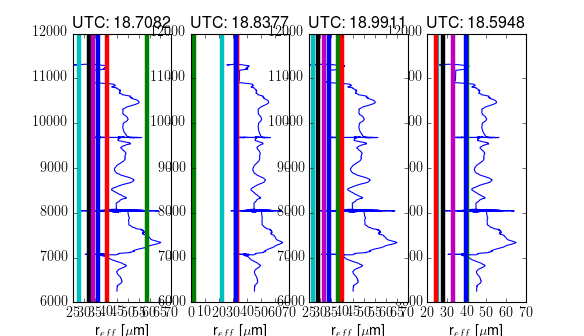

In [49]:
plt.figure()
for i,t in enumerate(tt):
    ax = plt.subplot(1,4,i)
    ax.plot(smooth(twoDS['effectiveD'][fl]/2.0,30),dc8['G_ALT'][fl],label='Cloud Probes (2DS)')
    ax.axvline(emas_ref_full[ie[i]],color='k',label='eMAS',lw=4)
    ax.axvline(rsp_ref[ir[i]],color='c',label='RSP',lw=4)
    ax.axvline(ssfr_ref[iss[i]],color='g',label='SSFR',lw=4)
    ax.axvline(modis_ref[im[i]],color='m',label='MODIS',lw=4)
    ax.axvline(star_ref[ist[i]],color='r',label='4STAR',lw=4)
    ax.axvline(goes_ref[ig[i]],color='b',label='GOES',lw=4)
    #ax.plot(smooth(apr['dbz'][:,iap[i]],20),apr['altflt'][:,iap[i]],label='APR-2')
    ax.set_title('UTC: {}'.format(t))
    if i==0:
        ax.set_ylabel('Altituce [m]')
    ax.set_xlabel('r$_{eff}$ [$\\mu$m]')
#plt.legend(frameon=True,loc=6)

### Update the plot with HVPS and FCDP

<IPython.core.display.Javascript object>


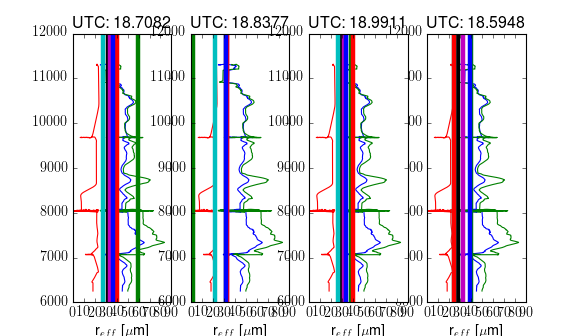

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\matplotlib\axes\_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


In [45]:
plt.figure()
for i,t in enumerate(tt):
    ax = plt.subplot(1,4,i)
    ax.plot(smooth(twoDS['effectiveD'][fl]/2.0,30),dc8['G_ALT'][fl],label='Cloud Probes (2DS)')
    ax.plot(smooth(hvps['effectiveD'][fl]/2.0,30),dc8['G_ALT'][fl],label='Cloud Probes (HVPS)')
    ax.plot(smooth(fcdp['effD'][fl]/2.0,30),dc8['G_ALT'][fl],label='Cloud Probes (FCDP)')
    ax.axvline(emas_ref_full[ie[i]],color='k',label='eMAS',lw=4)
    ax.axvline(rsp_ref[ir[i]],color='c',label='RSP',lw=4)
    ax.axvline(ssfr_ref[iss[i]],color='g',label='SSFR',lw=4)
    ax.axvline(modis_ref[im[i]],color='m',label='MODIS',lw=4)
    ax.axvline(star_ref[ist[i]],color='r',label='4STAR',lw=4)
    ax.axvline(goes_ref[ig[i]],color='b',label='GOES',lw=4)
    #ax.plot(smooth(apr['dbz'][:,iap[i]],20),apr['altflt'][:,iap[i]],label='APR-2')
    ax.set_title('UTC: {}'.format(t))
    if i==0:
        ax.set_ylabel('Altituce [m]')
    ax.set_xlabel('r$_{eff}$ [$\\mu$m]')

### Now bin the in situ cloud probes reff values

In [42]:
alt_bin_lims = np.linspace(6000,12000,16)

In [43]:
alt_pos = (alt_bin_lims[0:-1]+alt_bin_lims[1:])/2.0

In [65]:
fcdp_bins = []
twods_bins = []
hvps_bins = []
for i,c in enumerate(alt_bin_lims[0:-1]):
    alt_fl = (dc8['G_ALT'][fl]>=c)&(dc8['G_ALT'][fl]<alt_bin_lims[i+1])
    ffc = fcdp['effD'][fl][alt_fl]/2.0
    fcdp_bins.append(ffc[np.isfinite(ffc)])
    twods_bins.append(twoDS['effectiveD'][fl][alt_fl]/2.0)
    hvps_bins.append(hvps['effectiveD'][fl][alt_fl]/2.0)

In [45]:
def color_box(bp, color):

    # Define the elements to color. You can also add medians, fliers and means
    elements = ['boxes','caps','whiskers','medians','means','fliers']

    # Iterate over each of the elements changing the color
    for elem in elements:
        [plt.setp(bp[elem][idx], color=color) for idx in xrange(len(bp[elem]))]
    return

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111)
bo = ax.boxplot(fcdp_bins,0,'.',0,showmeans=True,positions=alt_pos,widths=3.0)
color_box(bo,'green')
[plt.setp(bo['fliers'][idx],alpha=0.05)for idx in xrange(len(bo['fliers']))]
plt.plot([a.get_xdata()[0] for a in bo['means']],alt_pos,'s-',zorder=100,color='green',label='FCDP',lw=2.5)

bo = ax.boxplot(twods_bins,0,'.',0,showmeans=True,positions=alt_pos,widths=10.0)
color_box(bo,'red')
[plt.setp(bo['fliers'][idx],alpha=0.05)for idx in xrange(len(bo['fliers']))]
plt.plot([a.get_xdata()[0] for a in bo['means']],alt_pos,'s-',zorder=100,color='red',label='2DS',lw=2.5)

bo = ax.boxplot(hvps_bins,0,'.',0,showmeans=True,positions=alt_pos,widths=3.0)
color_box(bo,'blue')
[plt.setp(bo['fliers'][idx],alpha=0.05)for idx in xrange(len(bo['fliers']))]
plt.plot([a.get_xdata()[0] for a in bo['means']],alt_pos,'s-',zorder=100,color='blue',label='HVPS',lw=2.5)

plt.legend(frameon=False,numpoints=1)
ax.set_ylim(6000,12000)
ti = ax.set_yticks([6000,7000,8000,9000,10000,11000,12000])
tl = ax.set_yticklabels([6,7,8,9,10,11,12])
ax.set_ylabel('Altitude [km]')
ax.set_xlabel('Effective Radius [$\\mu$m]')

<IPython.core.display.Javascript object>

NameError: name 'fcdp_bins' is not defined

In [ ]:
def plot_vert_cloud_probes(ax):
    bo = ax.boxplot(np.array(fcdp_bins)+12,0,'.',0,showmeans=True,positions=alt_pos,widths=3.0)
    color_box(bo,'peru')
    [plt.setp(bo['fliers'][idx],alpha=0.05)for idx in xrange(len(bo['fliers']))]
    [plt.setp(bo['means'][idx],alpha=0.05)for idx in xrange(len(bo['means']))]
    plt.plot([a.get_xdata()[0] for a in bo['means']],alt_pos,'s-',zorder=100,color='peru',label='FCDP',lw=2.0,alpha=0.6)

    bo = ax.boxplot(twods_bins,0,'.',0,showmeans=True,positions=alt_pos,widths=10.0)
    color_box(bo,'darkviolet')
    [plt.setp(bo['fliers'][idx],alpha=0.05)for idx in xrange(len(bo['fliers']))]
    [plt.setp(bo['means'][idx],alpha=0.05)for idx in xrange(len(bo['means']))]
    plt.plot([a.get_xdata()[0] for a in bo['means']],alt_pos,'s-',zorder=100,color='darkviolet',label='2DS',lw=2.0,alpha=0.6)

    bo = ax.boxplot(hvps_bins,0,'.',0,showmeans=True,positions=alt_pos,widths=3.0)
    color_box(bo,'darkgrey')
    [plt.setp(bo['fliers'][idx],alpha=0.05)for idx in xrange(len(bo['fliers']))]
    [plt.setp(bo['means'][idx],alpha=0.05)for idx in xrange(len(bo['means']))]
    plt.plot([a.get_xdata()[0] for a in bo['means']],alt_pos,'s-',zorder=100,color='darkgrey',label='HVPS',lw=2.0,alpha=0.6)

### Now plot at each time point, use averages for remote sensing

In [ ]:
iie[0]

In [ ]:
emas_r,rsp_r,ssfr_r = np.zeros_like(tt),np.zeros_like(tt),np.zeros_like(tt)
modis_r,star_r,goes_r = np.zeros_like(tt),np.zeros_like(tt),np.zeros_like(tt)
for i,t in enumerate(tt):
    emas_r[i] = np.nanmean(emas_ref_full[iie[i][1]:iie[i][0]])
    rsp_r[i] = np.nanmean(rsp_ref[iir[i][1]:iir[i][0]])
    ssfr_r[i] = np.nanmean(ssfr_ref[iiss[i][1]:iiss[i][0]])
    modis_r[i] = np.nanmean(modis_ref[iim[i][1]:iim[i][0]])
    star_r[i] = np.nanmean(star_ref[iist[i][1]:iist[i][0]])
    goes_r[i] = np.nanmean(goes_ref[iig[i][1]:iig[i][0]])

In [ ]:
for i,t in enumerate(tt):
    print i,t

<IPython.core.display.Javascript object>


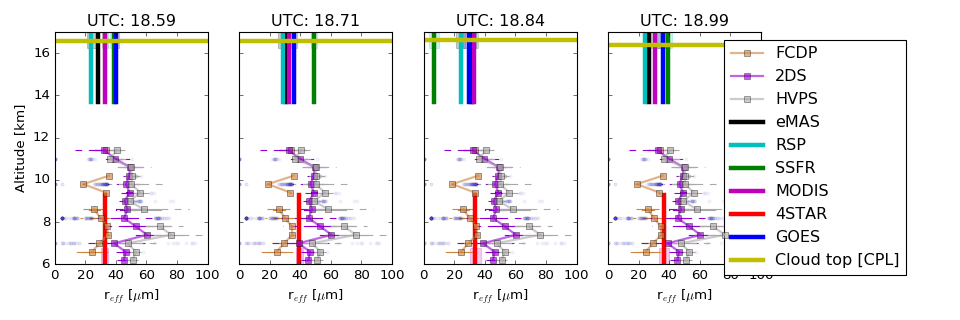

In [77]:
plt.figure(figsize=(12,4))
ax = plt.subplot(1,5,1)
#ti = ax.set_yticks([6000,7000,8000,9000,10000,11000,12000])
#tl = ax.set_yticklabels([6,7,8,9,10,11,12])
for i,t in enumerate(tt):
    ax = plt.subplot(1,5,i+1,sharey=ax)
    plot_vert_cloud_probes(ax)
    
    ax.axvline(emas_r[i],ymin=0.7,ymax=1,color='k',label='eMAS',lw=4)
    ax.axvline(rsp_r[i],ymin=0.7,ymax=1,color='c',label='RSP',lw=4)    
    ax.axvline(ssfr_r[i],ymin=0.7,ymax=1,color='g',label='SSFR',lw=4)
    ax.axvline(modis_r[i],ymin=0.7,ymax=1,color='m',label='MODIS',lw=4)
    ax.axvline(star_r[i],ymin=0.0,ymax=0.3,color='r',label='4STAR',lw=4)
    ax.axvline(goes_r[i],ymin=0.7,ymax=1,color='b',label='GOES',lw=4)
    
    ax.axvspan(rsp_r[i]-rsp_ref_std[ir[i]]*2.0,rsp_r[i]+rsp_ref_std[ir[i]]*2.0,ymin=0.93,ymax=1.0,color='k',alpha=0.2)
    ax.axvspan(ssfr_r[i]-ssfr_ref_std[iss[i]]*2.0,ssfr_r[i]+ssfr_ref_std[iss[i]]*2.0,ymin=0.93,ymax=1.0,color='c',alpha=0.2)
    ax.axvspan(modis_r[i]-modis_ref_std[im[i]]*2.0,modis_r[i]+modis_ref_std[im[i]]*2.0,ymin=0.93,ymax=1.0,color='g',alpha=0.2)
    ax.axvspan(star_r[i]-star_ref_std[ist[i]]*2.0,star_r[i]+star_ref_std[ist[i]]*2.0,ymin=0.0,ymax=0.07,color='m',alpha=0.2)
    ax.axvspan(goes_r[i]-goes_ref_std[ig[i]]*2.0,goes_r[i]+goes_ref_std[ig[i]]*2.0,ymin=0.93,ymax=1.0,color='b',alpha=0.2)
    
    ax.axhline(cpl_layers['top'][ic[i]][0],color='y',label='Cloud top [CPL]',lw=4)
    
    #ax.plot(smooth(apr['dbz'][:,iap[i]],20),apr['altflt'][:,iap[i]],label='APR-2')
    ax.set_title('UTC: {:2.2f}'.format(t))
    if i==0:
        ax.set_ylabel('Altitude [km]')
        #ax.set_ylim(6000,12000)
        ti = ax.set_yticks([6000,7000,8000,9000,10000,11000,12000])
        tl = ax.set_yticklabels([6,7,8,9,10,11,12])
    else: 
        #ti = ax.set_yticks([6000,7000,8000,9000,10000,11000,12000])
        plt.setp(ax.get_yticklabels(), visible=False)
        
    ax.set_xlabel('r$_{eff}$ [$\\mu$m]')
ti = ax.set_yticks([6000,8000,10000,12000,14000,16000])
tl = ax.set_yticklabels([6,8,10,12,14,16])
ax.set_ylim(6000,17000)
plt.legend(frameon=True,bbox_to_anchor=[2.0,1.0],numpoints=1)
plt.tight_layout()
plt.savefig(fp+'plots/20130913_vertical_profile_{vv}.png'.format(vv=vv),dpi=600,transparent=True)

## Checkout a possible retrieval using APR-2

In [ ]:
# using the empirical relationship between IWC and radar reflectiviyt from Ka band (35 Ghz) from Liao & Sassen, 1994
# IWC = 7.49*Z**0.78

In [56]:
apr.keys()

['dbz', 'zen_dbz', 'altfltz', 'utc', 'dbz_35', 'latz', 'altflt', 'lonz']

<IPython.core.display.Javascript object>


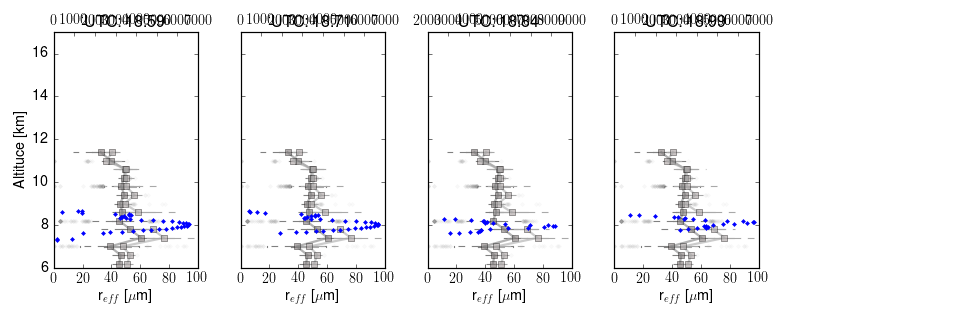

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: invalid value encountered in power
C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\matplotlib\axes\_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [57]:
plt.figure(figsize=(12,4))
ax = plt.subplot(1,5,1)
#ti = ax.set_yticks([6000,7000,8000,9000,10000,11000,12000])
#tl = ax.set_yticklabels([6,7,8,9,10,11,12])
for i,t in enumerate(tt):
    ax = plt.subplot(1,5,i+1,sharey=ax)
    plot_vert_cloud_probes(ax)
    
    ax1 = ax.twiny()
    ax1.plot(7.49*np.nanmean(apr['dbz'][:,iiap[i][1]:iiap[i][0]],axis=1)**0.78,
             np.nanmean(apr['altflt'][:,iiap[i][1]:iiap[i][0]],axis=1),'.')
    
    ax.set_title('UTC: {:2.2f}'.format(t))
    if i==0:
        ax.set_ylabel('Altituce [km]')
        #ax.set_ylim(6000,12000)
        ti = ax.set_yticks([6000,7000,8000,9000,10000,11000,12000])
        tl = ax.set_yticklabels([6,7,8,9,10,11,12])
    else: 
        #ti = ax.set_yticks([6000,7000,8000,9000,10000,11000,12000])
        plt.setp(ax.get_yticklabels(), visible=False)
        
    ax.set_xlabel('r$_{eff}$ [$\\mu$m]')
ti = ax.set_yticks([6000,8000,10000,12000,14000,16000])
tl = ax.set_yticklabels([6,8,10,12,14,16])
ax.set_ylim(6000,17000)
plt.legend(frameon=True,bbox_to_anchor=[2.0,1],numpoints=1)
plt.tight_layout()

In [58]:
apr['altflt'].shape

(600L, 3207L)

<IPython.core.display.Javascript object>


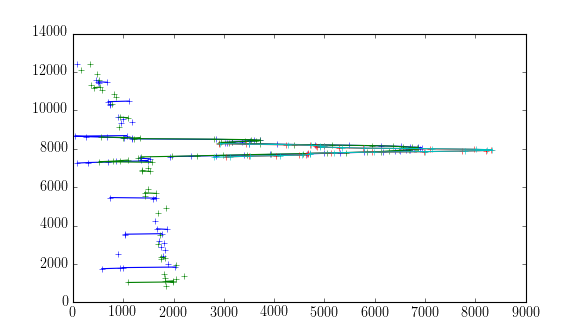

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in power
  app.launch_new_instance()


In [61]:
plt.figure()
for i,t in enumerate(tt):
    plt.plot(7.49*apr['dbz'][:,iap[i]]**0.78,
             apr['altflt'][:,iap[i]],'-+')

<IPython.core.display.Javascript object>


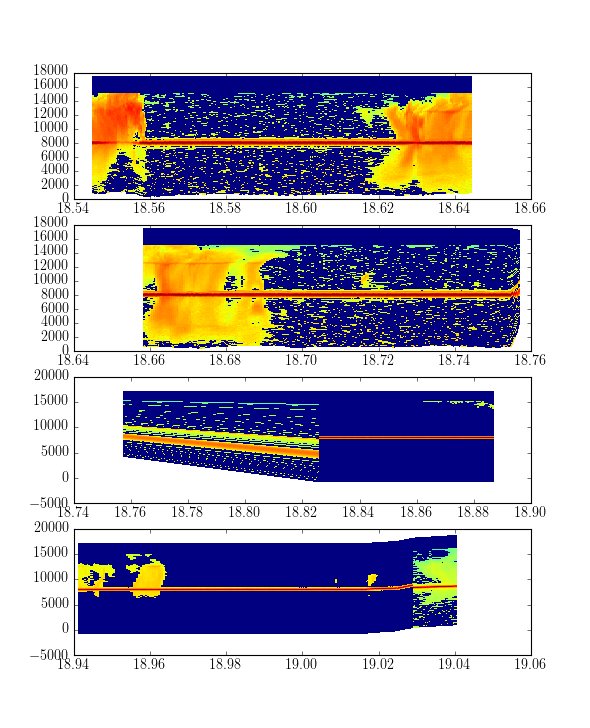

In [65]:
plt.figure()
for i,t in enumerate(tt):
    ax = plt.subplot(4,1,i+1)
    ax.pcolor(apr['utc'][iiap[i][1]:iiap[i][0]],apr['altflt'][:,iiap[i][1]:iiap[i][0]],apr['dbz'][:,iiap[i][1]:iiap[i][0]])

<IPython.core.display.Javascript object>


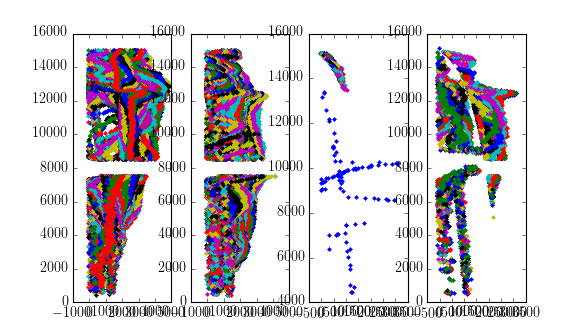

In [91]:
plt.figure()
for i,t in enumerate(tt):
    ax = plt.subplot(1,4,i+1)
    #print range(iiap[i][1],iiap[i][0])
    for j in range(iiap[i][1],iiap[i][0]):
        ax.plot(apr['dbz'][:,j],apr['altflt'][:,j],'.')
        
    #ax.pcolor(apr['utc'][iiap[i][1]:iiap[i][0]],apr['altflt'][:,iiap[i][1]:iiap[i][0]],apr['dbz'][:,iiap[i][1]:iiap[i][0]])

In [63]:
apr['dbz'].shape

(600L, 3207L)

In [168]:
altp_bin_lims = np.linspace(0,16000,32)
altp_pos = (altp_bin_lims[0:-1]+altp_bin_lims[1:])/2.0
pbins = []
apr_bins = []
ibins = []
apr_iwc_bins = []
for j,c in enumerate(altp_bin_lims[0:-1]):
    for i,t in enumerate(tt):
        alt_fl = (apr['altflt'][:,iiap[i][1]]>=c)&(apr['altflt'][:,iiap[i][1]]<altp_bin_lims[j+1])
        dbz = apr['dbz'][alt_fl,iiap[i][1]:iiap[i][0]].flatten()
        dbz = dbz[np.isfinite(dbz)]
        pbins.append(dbz)
        iwc = 7.49*dbz**0.78
        iwc = iwc[np.isfinite(iwc)]
        ibins.append(iwc)
    apr_bins.append(pbins)
    apr_iwc_bins.append(ibins)
    pbins = []
    ibins = []

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:13: RuntimeWarning: invalid value encountered in power


In [169]:
altp_pos.shape
apr_bins = np.array(apr_bins)
apr_iwc_bins = np.array(apr_iwc_bins)

<IPython.core.display.Javascript object>


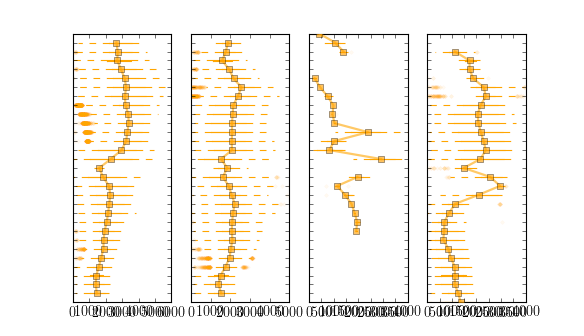

In [171]:
plt.figure()
for i,t in enumerate(tt):
    ax = plt.subplot(1,4,i+1)
    bo = ax.boxplot(apr_iwc_bins[:,i],0,'.',0,showmeans=True,positions=altp_pos,widths=3.0)
    color_box(bo,'orange')
    [plt.setp(bo['fliers'][idx],alpha=0.05)for idx in xrange(len(bo['fliers']))]
    [plt.setp(bo['means'][idx],alpha=0.05)for idx in xrange(len(bo['means']))]
    plt.plot([a.get_xdata()[0] for a in bo['means']],altp_pos,'s-',zorder=100,color='orange',label='APR-2',lw=2.0,alpha=0.6)
    plt.setp(ax.get_yticklabels(), visible=False)
    #ti = ax.set_yticks([6000,8000,10000,12000,14000,16000])
    #tl = ax.set_yticklabels([6,8,10,12,14,16])
    #print range(iiap[i][1],iiap[i][0])
    #for j in range(iiap[i][1],iiap[i][0]):
    #    ax.plot(apr['dbz'][:,j],apr['altflt'][:,j],'.')

<IPython.core.display.Javascript object>


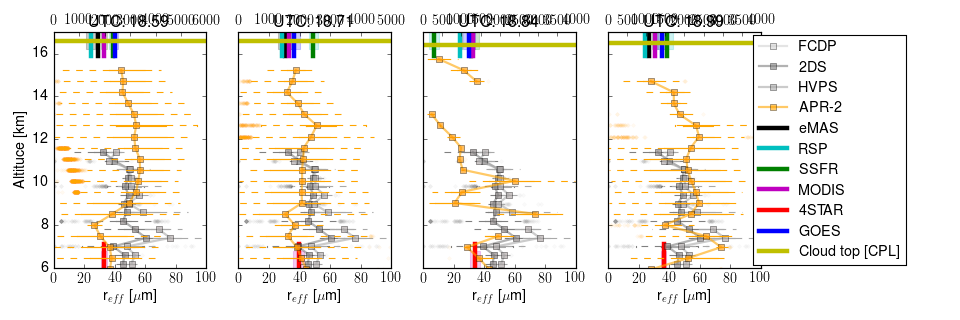

In [173]:
plt.figure(figsize=(12,4))
ax = plt.subplot(1,5,1)
#ti = ax.set_yticks([6000,7000,8000,9000,10000,11000,12000])
#tl = ax.set_yticklabels([6,7,8,9,10,11,12])
for i,t in enumerate(tt):
    ax = plt.subplot(1,5,i+1,sharey=ax)
    plot_vert_cloud_probes(ax)
    
    ax1 = ax.twiny()
    bo = ax1.boxplot(apr_iwc_bins[:,i],0,'.',0,showmeans=True,positions=altp_pos,widths=3.0)
    color_box(bo,'orange')
    [plt.setp(bo['fliers'][idx],alpha=0.05)for idx in xrange(len(bo['fliers']))]
    [plt.setp(bo['means'][idx],alpha=0.05)for idx in xrange(len(bo['means']))]
    ax1.plot([a.get_xdata()[0] for a in bo['means']],altp_pos,'s-',zorder=1,color='orange',label='APR-2',lw=2.0,alpha=0.6)
    ax.plot([],[],'s-',zorder=1,color='orange',label='APR-2',lw=2.0,alpha=0.6)
    
    ax.axvline(emas_r[i],ymin=0.9,ymax=1,color='k',label='eMAS',lw=4)
    ax.axvline(rsp_r[i],ymin=0.9,ymax=1,color='c',label='RSP',lw=4)    
    ax.axvline(ssfr_r[i],ymin=0.9,ymax=1,color='g',label='SSFR',lw=4)
    ax.axvline(modis_r[i],ymin=0.9,ymax=1,color='m',label='MODIS',lw=4)
    ax.axvline(star_r[i],ymin=0.0,ymax=0.1,color='r',label='4STAR',lw=4)
    ax.axvline(goes_r[i],ymin=0.9,ymax=1,color='b',label='GOES',lw=4)
    
    ax.axvspan(rsp_r[i]-rsp_ref_std[ir[i]]*2.0,rsp_r[i]+rsp_ref_std[ir[i]]*2.0,ymin=0.93,ymax=1.0,color='k',alpha=0.2)
    ax.axvspan(ssfr_r[i]-ssfr_ref_std[iss[i]]*2.0,ssfr_r[i]+ssfr_ref_std[iss[i]]*2.0,ymin=0.93,ymax=1.0,color='c',alpha=0.2)
    ax.axvspan(modis_r[i]-modis_ref_std[im[i]]*2.0,modis_r[i]+modis_ref_std[im[i]]*2.0,ymin=0.93,ymax=1.0,color='g',alpha=0.2)
    ax.axvspan(star_r[i]-star_ref_std[ist[i]]*2.0,star_r[i]+star_ref_std[ist[i]]*2.0,ymin=0.0,ymax=0.07,color='m',alpha=0.2)
    ax.axvspan(goes_r[i]-goes_ref_std[ig[i]]*2.0,goes_r[i]+goes_ref_std[ig[i]]*2.0,ymin=0.93,ymax=1.0,color='b',alpha=0.2)
    
    ax.axhline(cpl_layers['top'][ic[i]][0],color='y',label='Cloud top [CPL]',lw=4)
    
    #ax.plot(smooth(apr['dbz'][:,iap[i]],20),apr['altflt'][:,iap[i]],label='APR-2')
    ax.set_title('UTC: {:2.2f}'.format(t))
    if i==0:
        ax.set_ylabel('Altituce [km]')
        #ax.set_ylim(6000,12000)
        ti = ax.set_yticks([6000,7000,8000,9000,10000,11000,12000])
        tl = ax.set_yticklabels([6,7,8,9,10,11,12])
    else: 
        #ti = ax.set_yticks([6000,7000,8000,9000,10000,11000,12000])
        plt.setp(ax.get_yticklabels(), visible=False)
        
    ax.set_xlabel('r$_{eff}$ [$\\mu$m]')
ti = ax.set_yticks([6000,8000,10000,12000,14000,16000])
tl = ax.set_yticklabels([6,8,10,12,14,16])
ax.set_ylim(6000,17000)
h1, l1 = ax.get_legend_handles_labels()
plt.legend(h1,l1,frameon=True,bbox_to_anchor=[2.0,1.02],numpoints=1)
plt.tight_layout()

### Try it out, but using PCA to get representative radar reflectivities

In [174]:
from sklearn.decomposition import PCA

In [186]:
apr_dbz = apr['dbz'].copy()

In [187]:
apr_dbz[np.isnan(apr_dbz)] = -999

In [194]:
apr_dbz.shape

(600L, 3207L)

In [195]:
pca = PCA(n_components=7)
papr = pca.fit(apr_dbz[:,iiap[0][1]:iiap[0][0]].T)

In [198]:
papr.components_.shape

(7L, 600L)

<IPython.core.display.Javascript object>


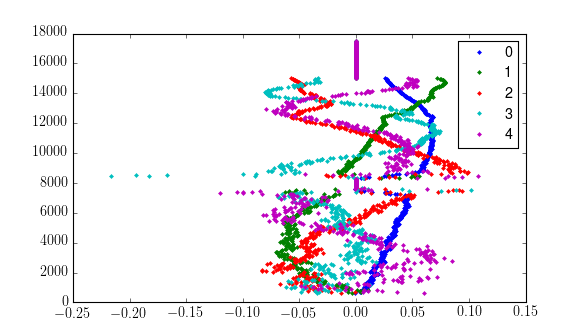

In [205]:
plt.figure()
for i in xrange(5):
    plt.plot(papr.components_[i,:],apr['altflt'][:,iap[0]],'.',label='{}'.format(i))
plt.legend(numpoints=1)

#looks like not a good solution going forward. 

### Now try to get a prototype member using knn and centroid analysis

In [208]:
from sklearn.neighbors.nearest_centroid import NearestCentroid

In [209]:
apr_dbz[:,iiap[0][1]:iiap[0][0]].T.shape

(199L, 600L)

In [217]:
ncc_sum = np.sum(apr_dbz[:,iiap[0][1]:iiap[0][0]],axis=0)
ncc_set = ncc_sum.copy()*0.0
ncc_set[ncc_sum>0] = 1.0

In [218]:
nc = NearestCentroid()
ncc = nc.fit(apr_dbz[:,iiap[0][1]:iiap[0][0]].T,ncc_set)

In [220]:
ncc.centroids_[1]

array([ -999.        ,  -999.        ,  -999.        ,  -999.        ,
        -999.        ,  -999.        ,  -999.        ,  -999.        ,
        -999.        ,  -999.        ,  -999.        ,  -999.        ,
        -999.        ,  -999.        ,  -999.        ,  -999.        ,
        -999.        ,  -999.        ,  -999.        ,  -999.        ,
        -999.        ,  -999.        ,  -999.        ,  -999.        ,
        -999.        ,  -999.        ,  -999.        ,  -999.        ,
        -999.        ,  -999.        ,  -999.        ,  -999.        ,
        -999.        ,  -999.        ,  -999.        ,  -999.        ,
        -999.        ,  -999.        ,  -999.        ,  -999.        ,
        -999.        ,  -999.        ,  -999.        ,  -999.        ,
        -999.        ,  -999.        ,  -999.        ,  -999.        ,
        -999.        ,  -999.        ,  -999.        ,  -999.        ,
        -999.        ,  -999.        ,  -999.        ,  -999.        ,
      

<IPython.core.display.Javascript object>


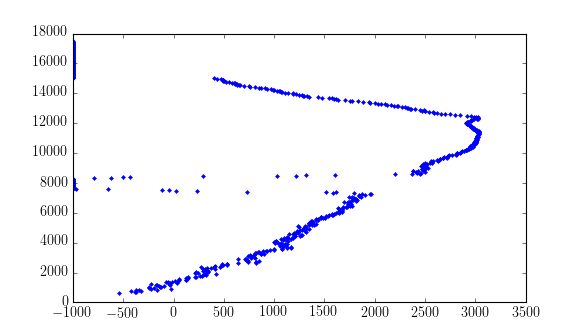

In [237]:
plt.figure()
#plt.plot(ncc.centroids_[0],apr['altflt'][:,iap[0]],'.')
plt.plot(ncc.centroids_[1],apr['altflt'][:,iap[0]],'.')

In [223]:
ncc_set

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

<IPython.core.display.Javascript object>


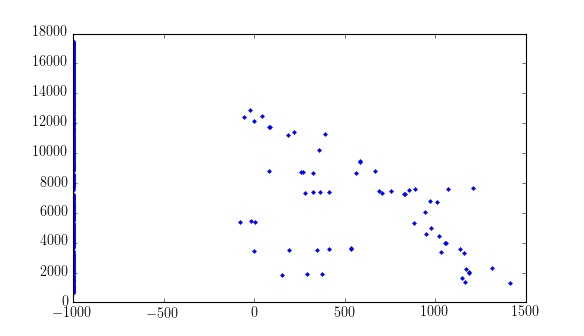

In [235]:
plt.figure()
plt.plot(apr_dbz[:,iiap[0][1]:iiap[0][0]][:,30],apr['altflt'][:,iap[0]],'.')

## Scatter plot the cloud properties

### Match the timing an space for each cloud prop

In [52]:
from write_utils import nearest_neighbor

In [51]:
print 'name', 'utc', 'tau', 'ref'
print 'emas',len(emas_utc_full), len(emas_tau_full), len(emas_ref_full)
print 'rsp', len(rsp_utc), len(rsp_tau), len(rsp_ref)
print 'ssfr', len(ssfr_utc), len(ssfr_tau), len(ssfr_ref)
print '4star', len(star_utc), len(star_tau), len(star_ref)
print 'goes', len(goes_utc), len(goes_tau), len(goes_ref)
print 'modis', 0.0, len(modis_tau), len(modis_ref)

name utc tau ref
emas 643 643 643
rsp 2637 2637 2637
ssfr 685 685 685
4star 180 180 180
goes 70 70 70
modis 0.0 180 180


In [74]:
dt = 5.0 # number of seconds to allow

In [76]:
emas_t_star = nearest_neighbor(emas_utc_full,emas_tau_full,star_utc,dist=dt/3600.0)
emas_r_star = nearest_neighbor(emas_utc_full,emas_ref_full,star_utc,dist=dt/3600.0)
print 'emas',len(emas_t_star),len(emas_r_star), np.nanmax(emas_t_star), np.nanmax(emas_r_star)

emas 180 180 14.99 34.98


In [77]:
rsp_t_star = nearest_neighbor(rsp_utc,rsp_tau,star_utc,dist=dt/3600.0)
rsp_r_star = nearest_neighbor(rsp_utc,rsp_ref,star_utc,dist=dt/3600.0)
rsp_ts_star = nearest_neighbor(rsp_utc,rsp_tau_std,star_utc,dist=dt/3600.0)
rsp_rs_star = nearest_neighbor(rsp_utc,rsp_ref_std,star_utc,dist=dt/3600.0)
print 'rsp',len(rsp_t_star),len(rsp_r_star), np.nanmax(rsp_t_star), np.nanmax(rsp_r_star),np.nanmean(rsp_ts_star),np.nanmean(rsp_rs_star)

rsp 180 180 41.9556 36.7778 0.0325772933828 0.721460617841


In [65]:
ssfr_utc = ssfr_utc.flatten()

In [78]:
ssfr_t_star = nearest_neighbor(ssfr_utc,ssfr_tau,star_utc,dist=dt/3600.0)
ssfr_r_star = nearest_neighbor(ssfr_utc,ssfr_ref,star_utc,dist=dt/3600.0)
ssfr_ts_star = nearest_neighbor(ssfr_utc,ssfr_tau_std.flatten(),star_utc,dist=dt/3600.0)
ssfr_rs_star = nearest_neighbor(ssfr_utc,ssfr_ref_std.flatten(),star_utc,dist=dt/3600.0)
print 'ssfr',len(ssfr_t_star),len(ssfr_r_star), np.nanmax(ssfr_t_star), np.nanmax(ssfr_r_star),\
            np.nanmean(ssfr_ts_star),np.nanmean(ssfr_rs_star)

ssfr 180 180 7.0 45.0 0.92618601471 1.48905245244


In [79]:
goes_t_star = nearest_neighbor(goes_utc,goes_tau,star_utc,dist=dt/3600.0)
goes_r_star = nearest_neighbor(goes_utc,goes_ref,star_utc,dist=dt/3600.0)
goes_ts_star = nearest_neighbor(goes_utc,goes_tau_std.flatten(),star_utc,dist=dt/3600.0)
goes_rs_star = nearest_neighbor(goes_utc,goes_ref_std.flatten(),star_utc,dist=dt/3600.0)
print 'goes',len(goes_t_star),len(goes_r_star), np.nanmax(goes_t_star), np.nanmax(goes_r_star),\
            np.nanmean(goes_ts_star),np.nanmean(goes_rs_star)

goes 180 180 19.22 39.505 0.685632638514 1.52673502385


### Plot the scatter plot, with std within FOV as error bars

In [87]:
from plotting_utils import plot_lin

In [88]:
help(plot_lin)

Help on function plot_lin in module plotting_utils:

plot_lin(x, y, x_err=[None], y_err=[None], color='b', labels=True, ci=0.95, shaded_ci=True, use_method='linfit', ax=None, *args, **kwargs)
    function to plot on top of previous a linear fit line, 
    with the line equation in legend.
    Input:
       x: independent
       y: dependent
       x_err: uncertainty in x (default None)
       y_err: uncertainty in y (default None)
       color: color of the plot (default blue)
       labels if include label in legend of linear equation values (default True)
       ci: Confidence interval (in percent) (default 95)
       shaded_ci: plot the shaded confidence interval (default True)
       use_method: Define which method to use for linear regression
                   options:
                   'linfit' (default) Use the linfit method from linfit module, when set, x_err and y_err are ignored
                   'odr' use the scipy ODR method to calculate the linear regression, with x_err

<IPython.core.display.Javascript object>


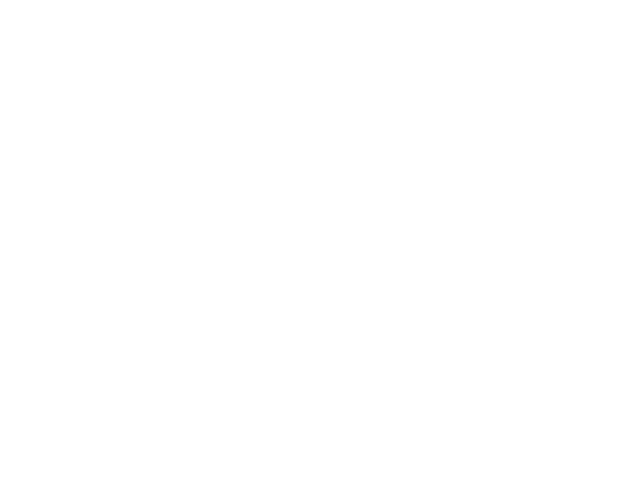

NameError: name 'emas_t_star' is not defined

In [5]:
plt.figure()

plt.errorbar(emas_t_star,star_tau,xerr=star_tau_std,yerr=0.2,label='eMAS',linestyle='None')
plt.errorbar(rsp_t_star,star_tau,xerr=star_tau_std,yerr=rsp_ts_star,label='RSP',linestyle='None')
plt.errorbar(ssfr_t_star,star_tau,xerr=star_tau_std,yerr=ssfr_ts_star,label='SSFR',linestyle='None')
plt.errorbar(modis_tau,star_tau,xerr=star_tau_std,yerr=modis_tau_std,label='MODIS',linestyle='None')
plt.errorbar(goes_t_star,star_tau,xerr=star_tau_std,yerr=goes_ts_star,label='GOES',linestyle='None')

plt.legend(frameon=False,loc=4,numpoints=1)